**Author**: _Pradip Kumar Das_

**License:** https://github.com/PradipKumarDas/Competitions/blob/main/LICENSE

**Profile & Contact:** [LinkedIn](https://www.linkedin.com/in/daspradipkumar/) | [GitHub](https://github.com/PradipKumarDas) | [Kaggle](https://www.kaggle.com/pradipkumardas) | pradipkumardas@hotmail.com (Email)

# Ugam Sentiment Analysis | MachineHack

**Dec. 22, 2021 - Jan. 10, 2022**

https://machinehack.com/hackathon/uhack_sentiments_20_decode_code_words/overview

**Sections:**
- Dependencies
- Exploratory Data Analysis (EDA) & Preprocessing
- Modeling & Evaluation
- Submission

NOTE: Running this notebook over CPU will be intractable as it uses Transformers, and hence it is recommended to use GPU.

# Dependencies

In [ ]:
# The following packages may need to be first installed on cloud hosted Data Science platforms such as Google Colab.

!pip install transformers

     |████████████████████████████████| 3.4 MB 5.6 MB/s 
     |████████████████████████████████| 596 kB 27.2 MB/s 
     |████████████████████████████████| 3.3 MB 36.2 MB/s 
     |████████████████████████████████| 895 kB 45.1 MB/s 
     |████████████████████████████████| 61 kB 442 kB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
# Imports required packages

import pandas as pd
import numpy as np

from sklearn.model_selection import StratifiedKFold

import tensorflow as tf
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

import transformers
from transformers import TFAutoModelForSequenceClassification, AutoTokenizer

import matplotlib.pyplot as plt
import seaborn as sns

import datetime, gc

# Initialization

In [ ]:
# Connects drive in Google Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
 # Changes working directory to the project directory
 cd "/content/drive/MyDrive/Colab/Ugam_Sentiment_Analysis/"

/content/drive/MyDrive/Colab/Ugam_Sentiment_Analysis


In [ ]:
# Configures styles for plotting runtime

plt.style.use("seaborn-whitegrid")
plt.rc(
    "figure",
    autolayout=True,
    figsize=(11, 4),
    titlesize=18,
    titleweight='bold',
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
%config InlineBackend.figure_format = 'retina'

# Sets Tranformer's level of verbosity to INFO level
transformers.logging.set_verbosity_error()

# Exploratory Data Analysis (EDA) & Preprocessing

In [ ]:
# Loads train data set
train = pd.read_csv("./data/train.csv")

# Checks few rows from train data set
display(train)

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,For some reason everybody complains and I'm co...,0,0,0,0,0,0,0,0,0,0,1,0
1,1,"I like everything about it, great choice of sp...",0,0,0,0,1,1,0,0,0,0,0,1
2,2,Excellent ceiling fan brace. Easy to install a...,0,0,0,0,0,0,1,0,0,1,0,1
3,3,Work great easy to use . No issues at all with...,0,0,0,0,0,1,0,0,0,0,1,1
4,4,I would recommend this product because it is p...,0,0,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6131,6131,Easy to install. Just be careful with the razo...,0,0,0,0,0,0,1,0,0,0,0,1
6132,6132,Got a big pup and she had to learn about scree...,0,0,0,0,0,0,0,0,0,1,1,1
6133,6133,We installed our Nest cam system a little over...,0,0,0,0,0,0,0,0,0,1,1,1
6134,6134,this is a below average camera . The only thin...,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
# Sets dataframe's `Id` columns as its index
train.set_index("Id", drop=True, append=False, inplace=True)

In [ ]:
# Loads test data set
test = pd.read_csv("./data/test.csv")

# Checks top few rows from test data set
display(test.head(5))

,Id,Review,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,0,Made of very thin cheap metal broke on very fi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,"As good as the brand names, no jams or misfire...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,"unit was easy to use, with understandable in s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,I am the new family plumber. Works well. No pr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Seems to be holding up well.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Sets dataframe's `Id` columns as its index
test.set_index("Id", drop=True, append=False, inplace=True)

Text(0.5, 0, 'Test Data')

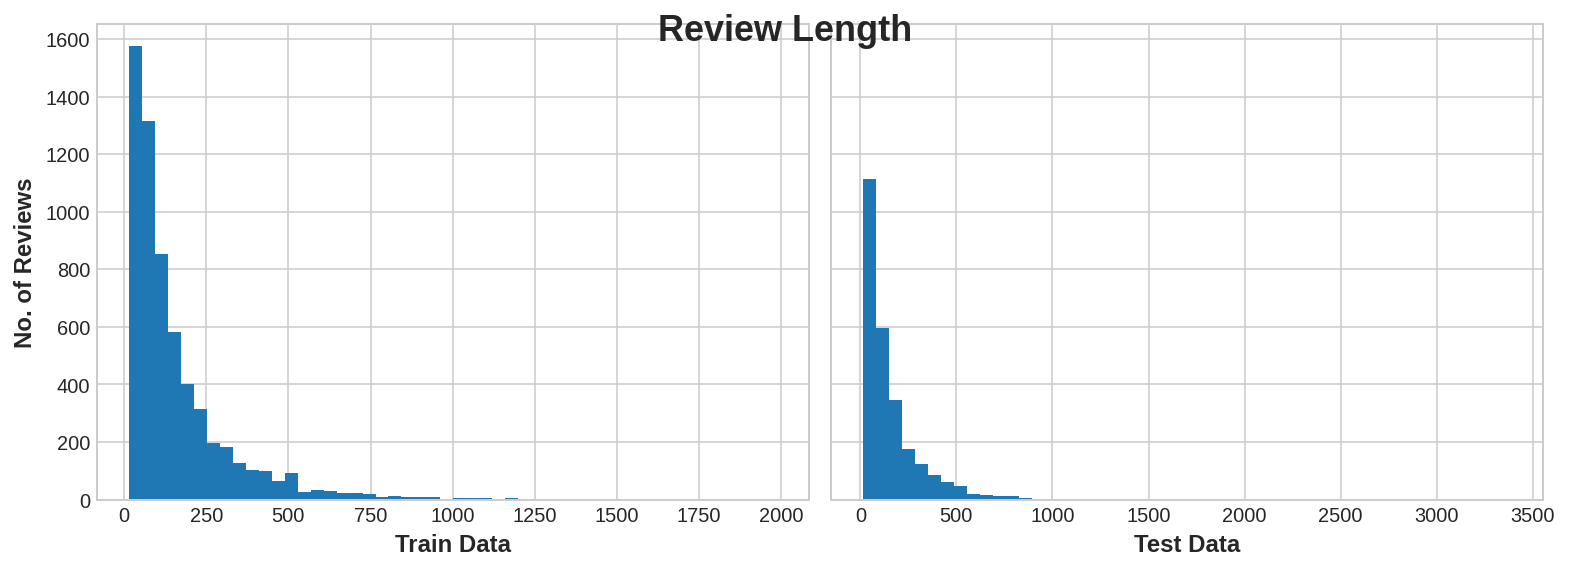

In [ ]:
# Checks the distribution of review length (number of characters in review)

fig, ax = plt.subplots(1, 2, sharey=True)
fig.suptitle("Review Length")
train.Review.str.len().plot(kind='hist', bins=50, ax=ax[0])
ax[0].set_xlabel("Train Data")
ax[0].set_ylabel("No. of Reviews")
test.Review.str.len().plot(kind='hist', bins=50, ax=ax[1])
ax[1].set_xlabel("Test Data")

The above plot shows that lengthy reviews containing 1000+ characters are less compares to that of reviews having less than 1000 characters. Hence, first 512 characters from the reviews will be considered for analysis.

In [ ]:
# Finds the distribution of each label
display(train.select_dtypes(["int"]).apply(pd.Series.value_counts))

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,5862,5957,5486,5441,5823,3598,5374,5981,5282,3959,4907,1366
1,274,179,650,695,313,2538,762,155,854,2177,1229,4770


In [ ]:
# Let's find stratified cross validation on 'Polarity' label will have same distribution 

sk_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_generator = sk_fold.split(train, train.Polarity)
for fold, (idx_train, idx_val) in enumerate(cv_generator):
    display(train.iloc[idx_train].select_dtypes(["int"]).apply(pd.Series.value_counts))

,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,4681,4766,4384,4333,4652,2892,4314,4790,4227,3139,3923,1092
1,227,142,524,575,256,2016,594,118,681,1769,985,3816


,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,4676,4766,4379,4363,4655,2881,4290,4785,4220,3184,3917,1093
1,233,143,530,546,254,2028,619,124,689,1725,992,3816


,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,4684,4768,4387,4345,4668,2876,4295,4784,4236,3179,3931,1093
1,225,141,522,564,241,2033,614,125,673,1730,978,3816


,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,4708,4763,4400,4367,4647,2885,4303,4790,4220,3181,3928,1093
1,201,146,509,542,262,2024,606,119,689,1728,981,3816


,Components,Delivery and Customer Support,Design and Aesthetics,Dimensions,Features,Functionality,Installation,Material,Price,Quality,Usability,Polarity
0,4699,4765,4394,4356,4670,2858,4294,4775,4225,3153,3929,1093
1,210,144,515,553,239,2051,615,134,684,1756,980,3816


It shows the same distribution is available in cross validation.

# Modeling & Evaluation

The approach is to use pretrained **Transfomer** model and to fine-tune, if required. As fine-tuning over cross-validation is time consuming even on GPUs, let's avoid it, and hence prepare one stratified validation set first to check pretrained model's or fine-tuned model's performance.

In [ ]:
# Creates data set splitter and gets indexes for train and validation rows
cv_generator = sk_fold.split(train, train.Polarity)
idx_train, idx_val = next(cv_generator)

In [ ]:
# Sets parameters for Transformer model fine-tuning
model_config = {
    "model_name": "distilbert-base-uncased-finetuned-sst-2-english", # selected pretrained model
    "max_length": 512, # maximum number of review characters allowed to input to model
}

In [ ]:
# Creates tokenizer from pre-trained transformer model
tokenizer = AutoTokenizer.from_pretrained(model_config["model_name"])

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

In [ ]:
# Tokenize reviews for train, validation and test data set

train_encodings = tokenizer(
    train.iloc[idx_train].Review.to_list(),
    max_length=model_config["max_length"],
    truncation=True,
    padding=True,
    return_tensors="tf"
)

val_encodings = tokenizer(
    train.iloc[idx_val].Review.to_list(),
    max_length=model_config["max_length"],
    truncation=True,
    padding=True,
    return_tensors="tf"
)

test_encodings = tokenizer(
    test.Review.to_list(),
    max_length=model_config["max_length"],
    truncation=True,
    padding=True,
    return_tensors="tf"
)

In [ ]:
# Performs target specific model fine-tuning 

"""
NOTE:

1) It was observed that increasing number of epochs more than one during model fine-tuning
does not improve model performance, and hence epochs is set to 1.

2) As pretrained model being used is already used for predicting sentiment polarity, that model
will not be fine-tuned any further, and will be used directly to predict sentimen polarity
against the test data. Fine-tuning was already experimented and found to be not useful as it 
decreases performance with higher log loss and lower accuracy on validation data.

"""

columns = train.select_dtypes(["int"]).columns.tolist()
columns.remove("Polarity")

# Fine-tunes models except that of Polarity

for column in columns:
    print(f"Fine tuning model for {column.upper()}...")
    print("======================================================\n")
    
    model = TFAutoModelForSequenceClassification.from_pretrained(model_config["model_name"])
    
    # Prepares tensorflow dataset for both train, validation and test data
    train_encodings_dataset = tf.data.Dataset.from_tensor_slices((
        {"input_ids": train_encodings["input_ids"], "attention_mask": train_encodings["attention_mask"]},
        train.iloc[idx_train][[column]]
    )).batch(16).prefetch(tf.data.AUTOTUNE)

    val_encodings_dataset = tf.data.Dataset.from_tensor_slices((
        {"input_ids": val_encodings["input_ids"], "attention_mask": val_encodings["attention_mask"]},
        train.iloc[idx_val][[column]]
    )).batch(16).prefetch(tf.data.AUTOTUNE)

    test_encodings_dataset = tf.data.Dataset.from_tensor_slices(
        {"input_ids": test_encodings["input_ids"], "attention_mask": test_encodings["attention_mask"]}
    ).batch(16).prefetch(tf.data.AUTOTUNE)
    
    predictions = tf.nn.softmax(model.predict(val_encodings_dataset).logits)
    print("Pretrained model's perfomance on validation data before fine-tuning:",
          tf.keras.metrics.binary_crossentropy(train.iloc[idx_val][column], predictions[:,1], from_logits=False).numpy(), "(log loss)",
          tf.keras.metrics.binary_accuracy(train.iloc[idx_val][column], predictions[:,1]).numpy(), "(accuracy)\n"
    )
    del predictions
    
    print("Starting fine tuning...")

    # Freezes model configuration before starting fine-tuning
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
        loss=tf.keras.losses.binary_crossentropy,
        metrics=[tf.keras.metrics.binary_crossentropy, tf.keras.metrics.binary_accuracy]
    )
    
    # Sets model file name to organize storing logs and fine-tuned models against
    # model_filename = f"{column}" + "_" + datetime.datetime.now().strftime("%Y.%m.%d-%H:%M:%S")
    
    # Fine tunes model
    model.fit(
        x=train_encodings_dataset,
        validation_data=val_encodings_dataset, 
        batch_size=16, 
        epochs=1, 
        # callbacks=[
        #     EarlyStopping(monitor="val_loss", mode="min", patience=2, restore_best_weights=True, verbose=1),
        #     ModelCheckpoint(filepath=f"./models/{model_filename}", monitor="val_loss", mode="min", save_best_only=True, save_weights_only=True),
        #     TensorBoard(log_dir=f"./logs/{model_filename}", histogram_freq=1, update_freq='epoch')
        # ], 
        use_multiprocessing=True)
    
    print("\nFine tuning was completed.\n")
    
    del train_encodings_dataset, val_encodings_dataset
    
    print("Performing prediction on test data...", end="")
    
    # Performs predictions on test data
    predictions = tf.nn.softmax(model.predict(test_encodings_dataset).logits)
    test[column] = predictions[:, 1]
    del test_encodings_dataset
    print("done\n")
    
    del predictions, model

print("Skipping fine-tuning model for POLARITY (as it uses pretrained model) and continuing direct prediction on test data...")
print("======================================================================================================================\n")

print("Performing prediction on test data...", end="")

model = TFAutoModelForSequenceClassification.from_pretrained(model_config["model_name"])

# Prepares tensorflow dataset for test data
test_encodings_dataset = tf.data.Dataset.from_tensor_slices(
    {"input_ids": test_encodings["input_ids"], "attention_mask": test_encodings["attention_mask"]}
).batch(16).prefetch(tf.data.AUTOTUNE)

# Performs predictions on test data
predictions = tf.nn.softmax(model.predict(test_encodings_dataset).logits)
test["Polarity"] = predictions[:, 1]
del test_encodings_dataset

del predictions, model

print("done\n")
print("Fine-tuning and test predictions were completed.")


Fine tuning model for COMPONENTS...

Pretrained model's perfomance on validation data before fine-tuning: 4.743803 (log loss) 0.30374593 (accuracy)

Starting fine tuning...
307/307 [==============================] - 498s 2s/step - loss: 1.2578 - binary_crossentropy: 1.2578 - binary_accuracy: 0.9130 - val_loss: 0.5904 - val_binary_crossentropy: 0.5904 - val_binary_accuracy: 0.9617

Fine tuning was completed.

Performing prediction on test data...done

Fine tuning model for DELIVERY AND CUSTOMER SUPPORT...

Pretrained model's perfomance on validation data before fine-tuning: 4.680458 (log loss) 0.31514657 (accuracy)

Starting fine tuning...
307/307 [==============================] - 498s 2s/step - loss: 0.8953 - binary_crossentropy: 0.8953 - binary_accuracy: 0.9365 - val_loss: 0.4648 - val_binary_crossentropy: 0.4648 - val_binary_accuracy: 0.9699

Fine tuning was completed.

Performing prediction on test data...done

Fine tuning model for DESIGN AND AESTHETICS...

Pretrained model's perf

# Submission

In [ ]:
# Saves test predictions
test.select_dtypes(["float"]).to_csv("./submission.csv", index=False)

***Leaderboard score for this submission was 8.8942 as against highest of that was 2.74 on Jan 06, 2022 at 11:50 PM.***